## 0) Preliminaries

In [1]:
library(ape)
library(ggtree)
library(phangorn)
library(Quartet)
library(adephylo)

Registered S3 method overwritten by 'ggtree':
  method      from 
  identify.gg ggfun

ggtree v3.2.1  For help: https://yulab-smu.top/treedata-book/

If you use ggtree in published research, please cite the most appropriate paper(s):

1. Guangchuang Yu. Using ggtree to visualize data on tree-like structures. Current Protocols in Bioinformatics. 2020, 69:e96. doi:10.1002/cpbi.96
2. Guangchuang Yu, Tommy Tsan-Yuk Lam, Huachen Zhu, Yi Guan. Two methods for mapping and visualizing associated data on phylogeny using ggtree. Molecular Biology and Evolution. 2018, 35(12):3041-3043. doi:10.1093/molbev/msy194
3. Guangchuang Yu, David Smith, Huachen Zhu, Yi Guan, Tommy Tsan-Yuk Lam. ggtree: an R package for visualization and annotation of phylogenetic trees with their covariates and other associated data. Methods in Ecology and Evolution. 2017, 8(1):28-36. doi:10.1111/2041-210X.12628




Attaching package: ‘ggtree’


The following object is masked from ‘package:ape’:

    rotate


Loading requir

## 1) Reading trees

In [3]:
ref_tree <- read.tree("../../config/esche_shige.tree")
rank_tree <- read.tree("rank_lucas_nj_tree_1.nwk")
dcj_tree <- read.tree("dcj_nj_tree_1.nwk")

## 2) Topological comparison of trees

### 2.1) Rank vs. Reference

In [4]:
RF.dist(rank_tree, ref_tree)
SplitStatus(rank_tree, ref_tree) # RF = d1 + d2
SymmetricDifference(SplitStatus(rank_tree, ref_tree)) # similarity by splits, aka RF
QuartetStatus(rank_tree, ref_tree)
SymmetricDifference(QuartetStatus(rank_tree, ref_tree)) # similarity by quartets

[1] 16

N,P1,P2,s,d1,d2,r1,r2
34,17,17,9,8,8,0,0


[1] 0.5294118

N,Q,s,d,r1,r2,u
9690,4845,3215,1630,0,0,0


[1] 0.6635707

### 2.2) DCJ vs. Reference

In [5]:
RF.dist(dcj_tree, ref_tree)
SplitStatus(dcj_tree, ref_tree) # RF = d1 + d2
SymmetricDifference(SplitStatus(dcj_tree, ref_tree)) # similarity by splits, aka RF
QuartetStatus(dcj_tree, ref_tree)
SymmetricDifference(QuartetStatus(dcj_tree, ref_tree)) # similarity by quartets

[1] 20

N,P1,P2,s,d1,d2,r1,r2
34,17,17,7,10,10,0,0


[1] 0.4117647

N,Q,s,d,r1,r2,u
9690,4845,3187,1658,0,0,0


[1] 0.6577915

## 3) Plotting

### 3.1) Reference

In [35]:
png("reference_tree.png")
plot <- ggtree(ref_tree, branch.length = "none") +
    geom_tiplab() + 
    geom_hilight(node=37, fill="green") +
    geom_cladelabel(node=37, label="B1", color="green", align=TRUE, offset=4.5) +
    geom_hilight(node=32, fill="blue") +
    geom_cladelabel(node=32, label="A", color="blue", align=TRUE, offset=5) +
    geom_hilight(node=25, fill="red") +
    geom_cladelabel(node=25, label="B2", color="red", align=TRUE, offset=4) +
    geom_hilight(node=24, fill="orange") +
    geom_cladelabel(node=24, label="D", color="orange", align=TRUE, offset=4) +
    geom_hilight(node=9, fill="orange") +
    geom_cladelabel(node=9, label="D", color="orange", align=TRUE, offset=4) +
    geom_hilight(node=35, fill="purple") +
    geom_cladelabel(node=35, label="S", color="purple", align=TRUE, offset=6) +
    geom_hilight(node=16, fill="purple") +
    geom_cladelabel(node=16, label="S", color="purple", align=TRUE, offset=6) +
    geom_hilight(node=10, fill="purple") +
    geom_cladelabel(node=10, label="S", color="purple", align=TRUE, offset=6.5) +
    xlim(0, 20)
print(plot)
dev.off()

png 
  2

### 3.2) Rank

I removed the branch lenghts so that the plot works. Don't know why it breaks with branch lengths, even though I pass `branch.length="none"`.
```bash
cat rank_lucas_nj_tree_1.nwk | sed 's/\:[0-9]*[\.[0-9]*]*//g' > rank_lucas_nj_tree_1.nwk.nobranch
```

In [12]:
rank_tree_nobranch <- read.tree("rank_lucas_nj_tree_1.nwk.nobranch")

png("rank_tree.png")
plot <- ggtree(rank_tree_nobranch) +
    geom_tiplab() +
    geom_hilight(node=26, fill="green") +
    geom_cladelabel(node=26, label="B1", color="green", align=TRUE, offset=4.5) +
    geom_hilight(node=29, fill="blue") +
    geom_cladelabel(node=29, label="A", color="blue", align=TRUE, offset=5) +
    geom_hilight(node=31, fill="orange") +
    geom_cladelabel(node=31, label="D", color="orange", align=TRUE, offset=4.5) +
    geom_hilight(node=33, fill="red") +
    geom_cladelabel(node=33, label="B2", color="red", align=TRUE, offset=4) +
    geom_hilight(node=37, fill="purple") +
    geom_cladelabel(node=37, label="S", color="purple", align=TRUE, offset=6.5) +
    xlim(0, 20)
print(plot)
dev.off()

png 
  2

### 3.2) DCJ-indel

I removed the branch lenghts so that the plot works. Don't know why it breaks with branch lengths, even though I pass `branch.length="none"`.
```bash
cat dcj_nj_tree_1.nwk | sed 's/\:[0-9]*[\.[0-9]*]*//g' > dcj_nj_tree_1.nwk.nobranch
```

In [14]:
dcj_tree_nobranch <- read.tree("dcj_nj_tree_1.nwk.nobranch")

png("dcj_tree.png")
plot <- ggtree(dcj_tree_nobranch) +
    geom_tiplab() +
    geom_hilight(node=31, fill="green") +
    geom_cladelabel(node=31, label="B1", color="green", align=TRUE, offset=4.5) +
    geom_hilight(node=29, fill="blue") +
    geom_cladelabel(node=29, label="A", color="blue", align=TRUE, offset=5) +
    geom_hilight(node=34, fill="orange") +
    geom_cladelabel(node=34, label="D", color="orange", align=TRUE, offset=4) +
    geom_hilight(node=1, fill="orange") +
    geom_cladelabel(node=1, label="D", color="orange", align=TRUE, offset=4) +
    geom_hilight(node=35, fill="red") +
    geom_cladelabel(node=35, label="B2", color="red", align=TRUE, offset=4) +
    geom_hilight(node=39, fill="purple") +
    geom_cladelabel(node=39, label="S", color="purple", align=TRUE, offset=6) +
    geom_hilight(node=16, fill="purple") +
    geom_cladelabel(node=16, label="S", color="purple", align=TRUE, offset=6) +
    geom_hilight(node=19, fill="purple") +
    geom_cladelabel(node=19, label="S", color="purple", align=TRUE, offset=6) +
    xlim(0, 20)
print(plot)
dev.off()

png 
  2

## 4) Face to face plots (OPTIONAL)

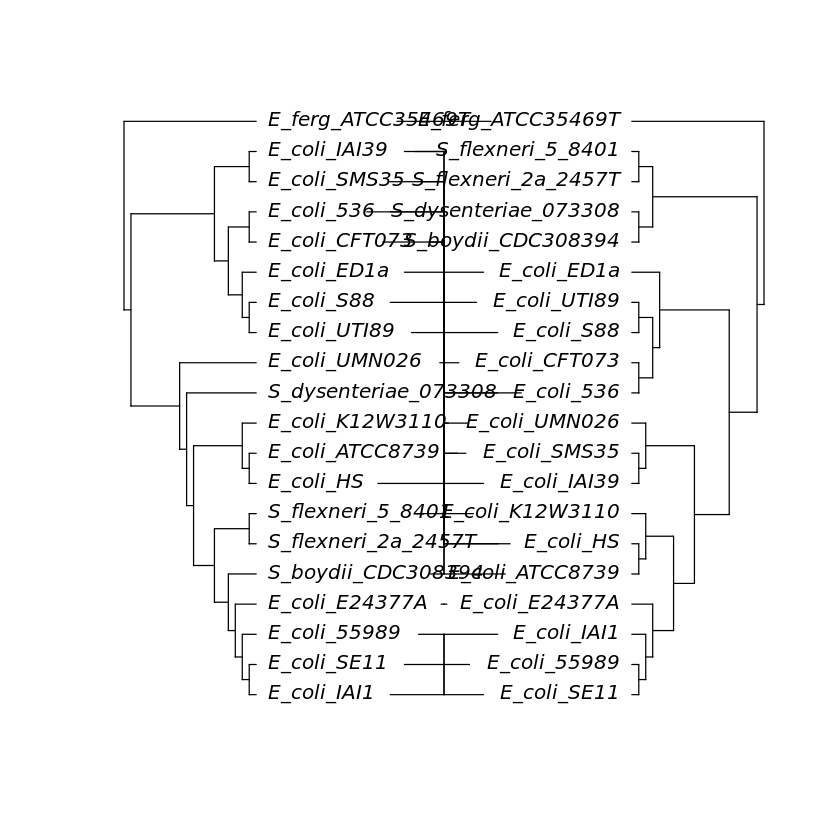

In [174]:
cophyloplot(ladderize(ref_tree), ladderize(rank_tree_nobranch), 
            assoc = matrix(rep(rank_tree$tip.label, 2), ncol = 2),
            length.line = 4, space = 28, gap = 3)